# Método de Newton-Raphson
## Búsqueda de raíces por aproximación de derivadas

In [8]:
#Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#Función objetivo (por defecto)
f = lambda x: x**3 - 2*x - 5
# Función ejemplo: x³ - 2x - 5, raíz aproximada ≈ 2.09455
# Derivada: f'(x) = 3x² - 2
df = lambda x: 3*x**2 - 2

In [10]:
#Implementación del método de Newton-Raphson
def metodo_newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    iteraciones, xn_vals, fxn_vals, errores = [], [], [], []
    xn = x0
    
    for i in range(max_iter):
        fxn = f(xn)
        dfxn = df(xn)
        
        # Validar que la derivada no sea cero
        if abs(dfxn) < 1e-12:
            raise ValueError("La derivada es cero, método no convergente")
        
        xn_nuevo = xn - fxn / dfxn
        error = abs(xn_nuevo - xn)
        
        iteraciones.append(i + 1)
        xn_vals.append(xn_nuevo)
        fxn_vals.append(f(xn_nuevo))
        errores.append(error)
        
        if error < tol:
            break
            
        xn = xn_nuevo
    
    tabla = pd.DataFrame({
        'Iteración': iteraciones,
        'x_n': np.round(xn_vals, 6),
        'f(x_n)': np.round(fxn_vals, 6),
        'Error_abs': np.round(errores, 6)
    })
    
    return xn_nuevo, tabla, xn_vals

In [11]:
#Ejecución con caso por defecto
raiz, tabla, historial = metodo_newton_raphson(f, df, 2.5)

print(f"Raíz encontrada: x = {raiz:.6f}")
print(f"Valor de la función: f(x) = {f(raiz):.6f}")
print("\nTabla de iteraciones:")
print(tabla)

Raíz encontrada: x = 2.094551
Valor de la función: f(x) = -0.000000

Tabla de iteraciones:
   Iteración       x_n    f(x_n)  Error_abs
0          1  2.164179  0.807945   0.335821
1          2  2.097135  0.028882   0.067044
2          3  2.094555  0.000042   0.002580
3          4  2.094551  0.000000   0.000004
4          5  2.094551 -0.000000   0.000000


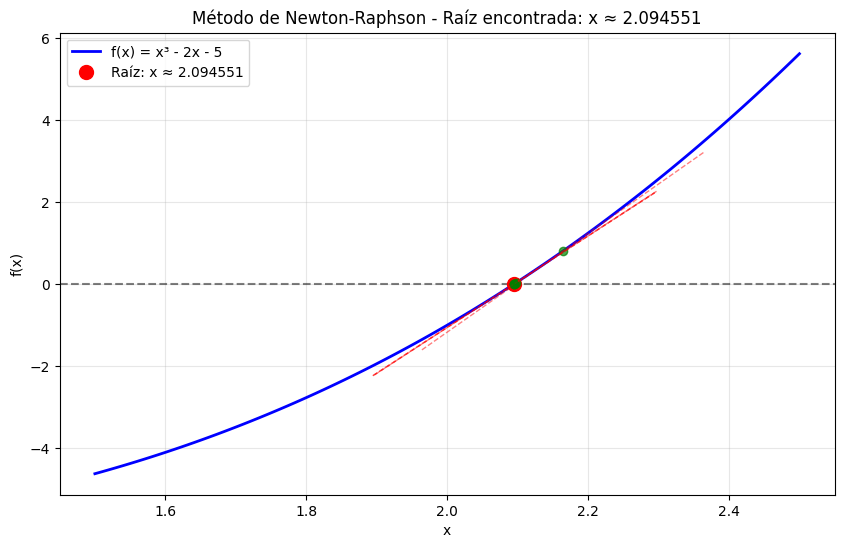

In [12]:
#Gráfica de la función y convergencia
x = np.linspace(1.5, 2.5, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x³ - 2x - 5')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.plot(raiz, f(raiz), 'ro', markersize=10, label=f'Raíz: x ≈ {raiz:.6f}')

# Marcar puntos de iteración y tangentes
for i, xn in enumerate(historial):
    plt.plot(xn, f(xn), 'go', markersize=6, alpha=0.7)
    if i < len(historial) - 1:  # Dibujar tangente
        m = df(xn)  # Pendiente
        x_tang = np.linspace(xn - 0.2, xn + 0.2, 10)
        y_tang = f(xn) + m * (x_tang - xn)
        plt.plot(x_tang, y_tang, 'r--', alpha=0.5, linewidth=1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Newton-Raphson - Raíz encontrada: x ≈ {raiz:.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

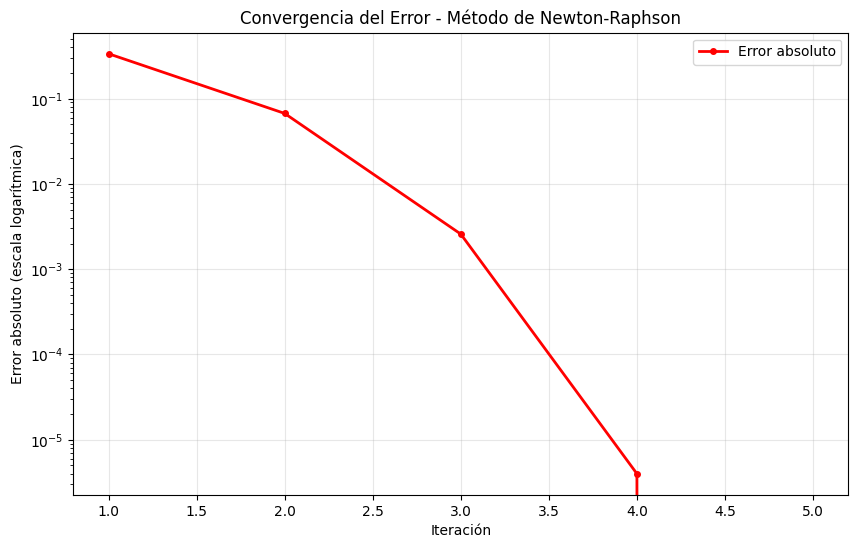

Error final: 0.00e+00
Convergencia cuadrática: error² ∝ error_5
Constante de convergencia cuadrática ≈ 0.5875


In [13]:
#Gráfica de error de convergencia
plt.figure(figsize=(10, 6))
plt.semilogy(tabla['Iteración'], tabla['Error_abs'], 'r-o', linewidth=2, markersize=4, label='Error absoluto')
plt.xlabel('Iteración')
plt.ylabel('Error absoluto (escala logarítmica)')
plt.title('Convergencia del Error - Método de Newton-Raphson')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Error final: {tabla['Error_abs'].iloc[-1]:.2e}")
print(f"Convergencia cuadrática: error² ∝ error_{i+1}")
if len(tabla) > 2:
    # Verificar convergencia cuadrática
    ratios = []
    for i in range(1, len(tabla)-1):
        if tabla['Error_abs'].iloc[i] > 0 and tabla['Error_abs'].iloc[i+1] > 0:
            ratio = tabla['Error_abs'].iloc[i+1] / (tabla['Error_abs'].iloc[i]**2)
            ratios.append(ratio)
    if ratios:
        print(f"Constante de convergencia cuadrática ≈ {np.mean(ratios):.4f}")

In [14]:
# Celda 7: Interfaz interactiva simple
print("=== Método de Newton-Raphson Interactivo ===")
print("Presiona Enter para usar valores por defecto")

# Obtener función del usuario
func_str = input("Ingresa la función (ej: x**2 - 4): ").strip()
if func_str:
    try:
        f_user = lambda x: eval(func_str)
        f_user(2)  # Validar que funciona
        f = f_user
        
        # Aproximar derivada numéricamente
        h = 1e-5
        df_user = lambda x: (f_user(x + h) - f_user(x - h)) / (2 * h)
        df = df_user
        print(f"Usando función: {func_str}")
    except:
        print("Función inválida, usando por defecto: x³ - 2x - 5")

# Obtener punto inicial
x0_str = input("Ingresa x0 (punto inicial): ").strip()
x0_user = float(x0_str) if x0_str else 2.5

try:
    raiz_user, tabla_user, _ = metodo_newton_raphson(f, df, x0_user)
    print(f"\nRaíz encontrada: x = {raiz_user:.6f}")
    print(tabla_user.tail())
except Exception as e:
    print(f"Error: {e}")

=== Método de Newton-Raphson Interactivo ===
Presiona Enter para usar valores por defecto

Raíz encontrada: x = 2.094551
   Iteración       x_n    f(x_n)  Error_abs
0          1  2.164179  0.807945   0.335821
1          2  2.097135  0.028882   0.067044
2          3  2.094555  0.000042   0.002580
3          4  2.094551  0.000000   0.000004
4          5  2.094551 -0.000000   0.000000
